In [219]:
import xarray as xr
import pandas as pd
import plotly.express as px
import plotly.graph_objs as go
import glob
import numpy as np
from scipy.stats import norm
import seaborn as sns


In [2]:
data_path = '/home/benv/data/verification'

In [3]:
year ='2022'
stationId='93439'
predictand='TTTTT'
model='ePD'

In [4]:
ds = xr.open_dataset(f'{data_path}/{year}/{model}/{predictand}/{stationId}.nc')

In [5]:
ds

<xarray.Dataset>
Dimensions:           (basetime: 8728, prognosis_period: 361)
Coordinates:
  * basetime          (basetime) datetime64[ns] 2022-01-01 ... 2022-12-31
  * prognosis_period  (prognosis_period) timedelta64[ns] 00:00:00 ... 15 days...
Data variables:
    validtime         (basetime, prognosis_period) datetime64[ns] ...
    obs_TTTTT         (basetime, prognosis_period) float32 ...
    mean              (basetime, prognosis_period) float32 ...
    var               (basetime, prognosis_period) float32 ...
    std               (basetime, prognosis_period) float32 ...
    p_obs             (basetime, prognosis_period) float32 ...
    cp_obs            (basetime, prognosis_period) float32 ...
    negloglik         (basetime, prognosis_period) float32 ...
    crps              (basetime, prognosis_period) float32 ...
Attributes:
    source:        S3 archive
    split_policy:  monthly splitting
    predictand:    TTTTT
    DT_kind:       ePD
    DT_job_type:   polishing
    pdf_type:      3

In [14]:
fig = px.line(ds.isel(basetime=0).to_dataframe(), x='validtime', y=['mean', 'obs_TTTTT'])

In [15]:
fig.show()

In [11]:
ds['cp_obs'].values.flatten()

array([0.09212214, 0.2830247 , 0.8132056 , ...,        nan,        nan,
              nan], dtype=float32)

In [21]:
ds.sel(basetime=ds['basetime'].values)

<xarray.Dataset>
Dimensions:           (basetime: 8728, prognosis_period: 361)
Coordinates:
  * basetime          (basetime) datetime64[ns] 2022-01-01 ... 2022-12-31
  * prognosis_period  (prognosis_period) timedelta64[ns] 00:00:00 ... 15 days...
Data variables:
    validtime         (basetime, prognosis_period) datetime64[ns] ...
    obs_TTTTT         (basetime, prognosis_period) float32 ...
    mean              (basetime, prognosis_period) float32 ...
    var               (basetime, prognosis_period) float32 ...
    std               (basetime, prognosis_period) float32 ...
    p_obs             (basetime, prognosis_period) float32 ...
    cp_obs            (basetime, prognosis_period) float32 0.09212 0.283 ... nan
    negloglik         (basetime, prognosis_period) float32 ...
    crps              (basetime, prognosis_period) float32 ...
Attributes:
    source:        S3 archive
    split_policy:  monthly splitting
    predictand:    TTTTT
    DT_kind:       ePD
    DT_job_type:   polishing
    pdf_type:      3

In [20]:
[ station.split('/')[-1:][0][:5] for station in glob.glob(f'{data_path}/{year}/{model}/{predictand}/*.nc')]

['93378',
 '93743',
 '93823',
 '93258',
 '93729',
 '93765',
 '93838',
 '93537',
 '93410',
 '93294',
 '93784',
 '93067',
 '93034',
 '93430',
 '93388',
 '93313',
 '93819',
 '93480',
 '93845',
 '93137',
 '93227',
 '93581',
 '93287',
 '93346',
 '93900',
 '93023',
 '93295',
 '93285',
 '93173',
 '93021',
 '93737',
 '90659',
 '93752',
 '93678',
 '93257',
 '93069',
 '90254',
 '93196',
 '93892',
 '93015',
 '93675',
 '93371',
 '93656',
 '93393',
 '93249',
 '93479',
 '93779',
 '93467',
 '93014',
 '93201',
 '93891',
 '93703',
 '93098',
 '93292',
 '93822',
 '93151',
 '93515',
 '93600',
 '90292',
 '93483',
 '93796',
 '93397',
 '93781',
 '93327',
 '93191',
 '93311',
 '93468',
 '93376',
 '93774',
 '93741',
 '93133',
 '93355',
 '93586',
 '93179',
 '93186',
 '93404',
 '93616',
 '93738',
 '93245',
 '93146',
 '93878',
 '93498',
 '93394',
 '93247',
 '93756',
 '93797',
 '93309',
 '93824',
 '93778',
 '93792',
 '93339',
 '93057',
 '93851',
 '93254',
 '93745',
 '90991',
 '93831',
 '93825',
 '93103',
 '93579',


## Prob bins

In [135]:
ds = xr.open_dataset(f'{data_path}/{year}/{model}/{predictand}/{stationId}.nc')
ds

<xarray.Dataset>
Dimensions:           (basetime: 730, prognosis_period: 85)
Coordinates:
  * basetime          (basetime) object '2022-01-01T00' ... '2022-12-31T12'
  * prognosis_period  (prognosis_period) timedelta64[ns] 00:00:00 ... 3 days ...
Data variables:
    validtime         (basetime, prognosis_period) object ...
    obs_TTTTT         (basetime, prognosis_period) float32 ...
    nwp_t2mc          (basetime, prognosis_period) float32 ...
    mean              (basetime, prognosis_period) float32 ...
    std               (basetime, prognosis_period) float32 ...
    cp_obs            (basetime, prognosis_period) float64 ...
    negloglik         (basetime, prognosis_period) float32 ...
    crps              (basetime, prognosis_period) float32 ...
Attributes:
    MLPP model:  DRN2
    NWP:         ARWECMWFcld_single_nz4km

In [147]:
ds['p_obs'] = xr.DataArray(norm.pdf(ds['obs_TTTTT'], ds['mean'], ds['std']), dims=('basetime', 'prognosis_period'))

In [126]:

station_id = '93439'
# define function to apply floor
def floor_func(arr):
    return np.floor(arr*10)/10

def count_lead_time_prob_bins(ds, var):
    prob_bins = (xr.apply_ufunc(floor_func, ds[[var]]).to_dataframe()
        .reset_index().groupby(['prognosis_period', var]).count().reset_index()
        .rename(columns={'basetime' : f'{var}_count', var : 'bin'})
        .assign(lead_hour = lambda x: x['prognosis_period'] / np.timedelta64(1, 'h') )
        .set_index(['lead_hour','bin'])
        .drop(columns=['prognosis_period']))
    
    return prob_bins


p_obs_bins = count_lead_time_prob_bins(ds, 'p_obs')
cp_obs_bins = count_lead_time_prob_bins(ds, 'cp_obs')

p_obs_bins.join(cp_obs_bins, how='outer').assign(stationId = station_id)

p_obs_count  cp_obs_count stationId
lead_hour bin                                     
0.0       0.0        691.0           857     93439
          0.1       1017.0           789     93439
          0.2       1395.0           795     93439
          0.3       1862.0           801     93439
          0.4       2005.0           859     93439
...                    ...           ...       ...
360.0     0.5          NaN           709     93439
          0.6          NaN           732     93439
          0.7          NaN           919     93439
          0.8          NaN          1003     93439
          0.9          NaN           764     93439

[3610 rows x 3 columns]

In [150]:
predictand = 'TTTTT'
nwp_var='t2mc'
year='2022'
data_path = '/home/benv/data/verification'
model='DRN2_ARWECMWFcld_single_nz4km' #'ePD' #

In [151]:
for file in glob.glob(f'{data_path}/{year}/{model}/{predictand}/*.nc'):
    print(f'{file[:-3]}')
    station_id = f'{file[-8:-3]}'
    ds = xr.open_dataset(file)

    if 'p_obs' not in ds.data_vars:
        ds['p_obs'] = xr.DataArray(norm.pdf(ds[f'obs_{predictand}'], ds['mean'], ds['std']),
                                   dims=('basetime', 'prognosis_period'))

    p_obs_bins = count_lead_time_prob_bins(ds, 'p_obs')
    cp_obs_bins = count_lead_time_prob_bins(ds, 'cp_obs')

    (p_obs_bins.join(cp_obs_bins, how='outer')
        .assign(stationId = station_id)
        .to_parquet(f'{file[:-3]}_prob_bins.parquet'))

/home/benv/data/verification/2022/DRN2_ARWECMWFcld_single_nz4km/TTTTT/93378
/home/benv/data/verification/2022/DRN2_ARWECMWFcld_single_nz4km/TTTTT/93743
/home/benv/data/verification/2022/DRN2_ARWECMWFcld_single_nz4km/TTTTT/93823
/home/benv/data/verification/2022/DRN2_ARWECMWFcld_single_nz4km/TTTTT/93258
/home/benv/data/verification/2022/DRN2_ARWECMWFcld_single_nz4km/TTTTT/93729
/home/benv/data/verification/2022/DRN2_ARWECMWFcld_single_nz4km/TTTTT/93765
/home/benv/data/verification/2022/DRN2_ARWECMWFcld_single_nz4km/TTTTT/93838
/home/benv/data/verification/2022/DRN2_ARWECMWFcld_single_nz4km/TTTTT/93537
/home/benv/data/verification/2022/DRN2_ARWECMWFcld_single_nz4km/TTTTT/93410
/home/benv/data/verification/2022/DRN2_ARWECMWFcld_single_nz4km/TTTTT/93294
/home/benv/data/verification/2022/DRN2_ARWECMWFcld_single_nz4km/TTTTT/93784
/home/benv/data/verification/2022/DRN2_ARWECMWFcld_single_nz4km/TTTTT/93067
/home/benv/data/verification/2022/DRN2_ARWECMWFcld_single_nz4km/TTTTT/93034
/home/benv/d

In [153]:
def load_prob_bins_leadtime(model_path):
    _ds = pd.concat([pd.read_parquet(file)
            for file in glob.glob(f'{model_path}/*_prob_bins.parquet')])
    return _ds

In [244]:
model_prob_bins = load_prob_bins_leadtime(f'{data_path}/{year}/{model}/{predictand}/').assign(model = model)
epd_prob_bins = load_prob_bins_leadtime(f'{data_path}/{year}/ePD/{predictand}/').assign(model = 'ePD')

In [285]:
epd_prob_bins

p_obs_count  cp_obs_count stationId model
lead_hour bin                                           
0.0       0.0       1468.0         806.0     93773   ePD
          0.1       2606.0         902.0     93773   ePD
          0.2       2578.0         825.0     93773   ePD
          0.3       1326.0         828.0     93773   ePD
          0.4        551.0         900.0     93773   ePD
...                    ...           ...       ...   ...
360.0     0.5          NaN         773.0     93346   ePD
          0.6          NaN         796.0     93346   ePD
          0.7          NaN         888.0     93346   ePD
          0.8          NaN         953.0     93346   ePD
          0.9          NaN         793.0     93346   ePD

[549078 rows x 4 columns]

In [247]:
prob_bins = pd.concat([model_prob_bins, epd_prob_bins])

In [251]:
models_prob_bins = prob_bins.groupby(['model']).apply(lambda x: x[['cp_obs_count','p_obs_count']].groupby(['bin']).sum() / x[['cp_obs_count','p_obs_count']].sum())
models_prob_bins

cp_obs_count   p_obs_count
model                         bin                            
DRN2_ARWECMWFcld_single_nz4km 0.0      0.109429  1.803722e-01
                              0.1      0.079365  2.302882e-01
                              0.2      0.080204  2.618445e-01
                              0.3      0.083787  1.821265e-01
                              0.4      0.088720  9.621696e-02
                              0.5      0.094418  3.683470e-02
                              0.6      0.100716  9.898626e-03
                              0.7      0.107557  1.993251e-03
                              0.8      0.115419  3.442619e-04
                              0.9      0.140332  6.191614e-05
                              1.0      0.000051  1.346446e-05
                              1.1      0.000000  4.182144e-06
                              1.2      0.000000  9.180317e-07
                              1.3      0.000000  3.060106e-07
                              1.5      0.000000  1.020035e-07
ePD                           0.0      0.103024  3.048826e-01
                              0.1      0.097468  4.237374e-01
                              0.2      0.094905  1.686628e-01
                              0.3      0.095182  6.407816e-02
                              0.4      0.097239  2.494776e-02
                              0.5      0.100138  9.178759e-03
                              0.6      0.103123  3.127565e-03
                              0.7      0.105450  9.743686e-04
                              0.8      0.105884  2.928411e-04
                              0.9      0.097587  9.333398e-05
                              1.0      0.000000  2.358086e-05
                              1.1      0.000000  7.889747e-07

In [252]:
model_prob_bins_stations = prob_bins.groupby(['model','stationId']).apply(lambda x: x[['cp_obs_count','p_obs_count']].groupby(['bin']).sum() / x[['cp_obs_count','p_obs_count']].sum())
model_prob_bins_stations

cp_obs_count  p_obs_count
model                         stationId bin                           
DRN2_ARWECMWFcld_single_nz4km 55083     0.0      0.041893     0.119041
                                        0.1      0.063033     0.109604
                                        0.2      0.076873     0.156757
                                        0.3      0.086618     0.222866
                                        0.4      0.092721     0.224663
...                                                   ...          ...
ePD                           93900     0.5      0.106316     0.005378
                                        0.6      0.102888     0.000975
                                        0.7      0.093867     0.000128
                                        0.8      0.085709     0.000006
                                        0.9      0.104217     0.000000

[3195 rows x 2 columns]

<Axes: xlabel='bin', ylabel='cp_obs_count'>

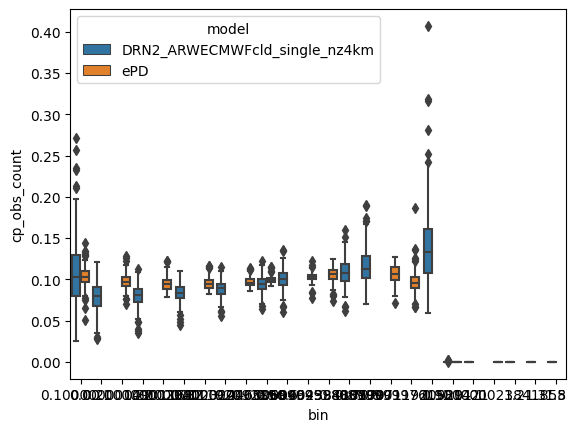

In [258]:
sns.boxplot(data=model_prob_bins_stations.reset_index(), 
            x='bin',
            y='cp_obs_count', 
            hue='model')

In [262]:
fig = px.box(model_prob_bins_stations.reset_index(), x='bin', #model_prob_bins_stations.index.get_level_values('bin'),
             y='cp_obs_count',
             color="model",
             notched=False, # used notched shape
             title="Box plot of total bill",
             hover_data='stationId' # add day column to hover data
            )
fig.add_hline(y=0.1, line_width=2, line_color="red")
fig.update_xaxes(range=[-0.05,0.95])
fig.show()

In [278]:
fig = px.bar(models_prob_bins.reset_index(), x='bin', y='cp_obs_count',color='model',  barmode='group', facet_col=None)
fig.add_hline(y=0.1, line_width=2, line_color="red")
fig.update_xaxes(range=[-0.05,0.95])
# show the plot
fig.show()

In [282]:
fig = px.box(model_prob_bins_stations.reset_index(), x='bin', #model_prob_bins_stations.index.get_level_values('bin'),
             y='p_obs_count',
             color="model",
             notched=False, # used notched shape
             title="Box plot of total bill",
             hover_data='stationId' # add day column to hover data
            )
fig.update_xaxes(range=[-0.05,0.95])
fig.show()

In [281]:
fig = px.bar(models_prob_bins.reset_index(), x='bin', y='p_obs_count',color='model',  barmode='group', facet_col=None)
fig.update_xaxes(range=[-0.05,0.95])
# show the plot
fig.show()

In [206]:
model_prob_bins_stations.xs(0.5, level=1)

,cp_obs_count,p_obs_count
stationId,,
55083,0.099179,0.124771
90147,0.081519,0.022880
90254,0.092122,0.132444
90292,0.093340,0.012298
90294,0.099135,0.012757
...,...,...
93892,0.096327,0.040678
93898,0.094694,0.077541
93900,0.099399,0.060527


## CRPSS

In [298]:
def load_mean_leadtime(model_path):
    _ds = pd.concat([pd.read_parquet(file).assign(stationId = file.split('/')[-1:][0][:5])
            for file in glob.glob(f'{model_path}/*_leadtime_mean.parquet')])
    _ds['lead_hour'] = _ds.index / np.timedelta64(1, 'h')
    return _ds

In [301]:
model_leadtimes = load_mean_leadtime(f'{data_path}/{year}/{model}/{predictand}/').assign(model = model)
epd_leadtimes = load_mean_leadtime(f'{data_path}/{year}/ePD/{predictand}/').assign(model = 'ePD')

In [330]:
model_leadtimes

,obs_TTTTT,nwp_t2mc,mean,std,cp_obs,negloglik,crps,error,mae,nwp_error,nwp_mae,stationId,lead_hour,model
prognosis_period,,,,,,,,,,,,,,
0 days 00:00:00,14.597161,14.432799,14.451481,1.136702,0.538258,1.432497,0.574899,-0.138434,0.809413,-0.156401,0.749539,93402,0.0,DRN2_ARWECMWFcld_single_nz4km
0 days 01:00:00,14.633707,14.604610,14.600368,1.221542,0.503726,1.468337,0.584520,-0.034072,0.805934,-0.029657,0.754376,93402,1.0,DRN2_ARWECMWFcld_single_nz4km
0 days 02:00:00,14.605838,14.585862,14.590783,1.229888,0.498513,1.469846,0.583985,-0.015055,0.799410,-0.019975,0.763424,93402,2.0,DRN2_ARWECMWFcld_single_nz4km
0 days 03:00:00,14.427613,14.428406,14.417929,1.228729,0.496155,1.439312,0.568109,-0.011476,0.777630,-0.002597,0.755117,93402,3.0,DRN2_ARWECMWFcld_single_nz4km
0 days 04:00:00,14.147137,14.152387,14.118181,1.219295,0.506349,1.423983,0.570685,-0.038566,0.794288,-0.004937,0.784490,93402,4.0,DRN2_ARWECMWFcld_single_nz4km
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3 days 08:00:00,14.456260,14.867382,14.647135,1.193262,0.480710,1.931200,0.838460,0.190875,1.159876,0.411121,1.205484,93191,80.0,DRN2_ARWECMWFcld_single_nz4km
3 days 09:00:00,15.046090,15.314047,15.165534,1.189105,0.498366,1.947223,0.853195,0.117588,1.176925,0.267533,1.222846,93191,81.0,DRN2_ARWECMWFcld_single_nz4km
3 days 10:00:00,15.525343,15.689020,15.610262,1.194524,0.506102,1.943028,0.862381,0.083456,1.188745,0.163458,1.255539,93191,82.0,DRN2_ARWECMWFcld_single_nz4km


In [320]:
crpss = (epd_leadtimes[['stationId', 'lead_hour', 'crps' ]]
    .merge(model_leadtimes[['stationId', 'lead_hour', 'crps' ]],
           on=['stationId', 'lead_hour'],
           suffixes=('_epd', '_model'))
    .assign(crpss = lambda x: 1 - x.crps_model/x.crps_epd))
crpss

,stationId,lead_hour,crps_epd,crps_model,crpss
0,93402,0.0,0.510431,0.574899,-0.126302
1,93402,1.0,0.530040,0.584520,-0.102786
2,93402,2.0,0.530755,0.583985,-0.100291
3,93402,3.0,0.525219,0.568109,-0.081660
4,93402,4.0,0.551359,0.570685,-0.035053
...,...,...,...,...,...
12915,93191,80.0,0.868106,0.838460,0.034150
12916,93191,81.0,0.848901,0.853195,-0.005058
12917,93191,82.0,0.855676,0.862381,-0.007836
12918,93191,83.0,0.850965,0.877955,-0.031717


In [323]:
crpss_lead = crpss[['lead_hour','crps_epd','crps_model','crpss']].groupby('lead_hour').mean()
crpss_lead

,crps_epd,crps_model,crpss
lead_hour,,,
0.0,0.671059,0.780808,-0.171411
1.0,0.677851,0.749532,-0.114155
2.0,0.683324,0.737490,-0.089581
3.0,0.685843,0.736955,-0.084751
4.0,0.681462,0.729630,-0.079873
...,...,...,...
80.0,0.886931,0.875301,0.002067
81.0,0.857877,0.879210,-0.034613
82.0,0.885250,0.899618,-0.026260


In [324]:
trace1 = go.Scatter(x=crpss_lead.index,
                    y=crpss_lead['crpss'],
                    mode='lines',
                    name='model vs. EPD')


layout = go.Layout(
    title='Mean CRPSS - All Stations',
    xaxis=dict(title='Lead Time Hour'),
    yaxis=dict(title='Skill %')
)

# create plot figure with multiple line plot traces
fig1 = go.Figure(data=[trace1], layout=layout)
# fig1.update_xaxes(range=[0 ,st.session_state["max_lead"]])
fig1.show()

In [326]:
crpss_station = crpss[['stationId','crps_epd','crps_model','crpss']].groupby('stationId').mean()
crpss_station

,crps_epd,crps_model,crpss
stationId,,,
90254,0.976092,0.931038,0.044436
90292,0.768621,0.769622,-0.004714
90294,0.685202,0.734877,-0.076111
90659,0.970239,1.077026,-0.113288
90766,0.494213,0.486298,0.013640
...,...,...,...
93878,0.710337,0.775764,-0.095314
93891,1.171128,1.329404,-0.139527
93892,0.682668,0.755771,-0.108222


<Axes: >

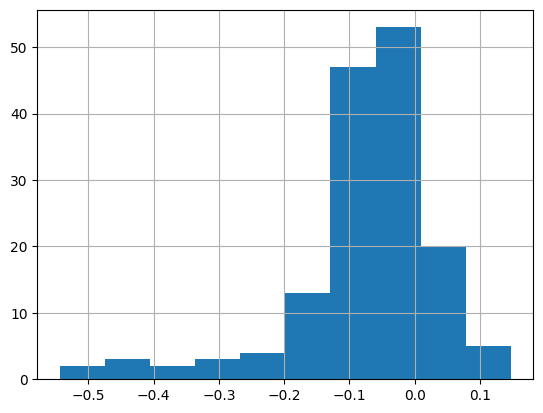

In [329]:
crpss_station['crpss'].hist()